# Homework 4

- Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [3]:
# insert code here
n_f = df.select_dtypes(include=['float64', 'int64']).columns.tolist()[:-1]
c_f = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical features:", n_f)
print("Categorical features:", c_f)

Numerical features: ['condition', 'odometer', 'auction_value']
Categorical features: ['make', 'transmission', 'state']


In the above code I have created two different lists for numerical and categorial variables.

## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [10]:
# insert code here

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define the pipeline
n_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Replace missing values with median
    ('scaler', StandardScaler()) # Standardize the values using a standard scaler
])
# insert code here
from sklearn.preprocessing import OneHotEncoder

# Define the pipeline
c_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Replace missing values with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first')) # One-hot encoding with dropping one category
])

X_num_transformed = n_pipeline.fit_transform(df[n_f])


In the above code 'simpleimputer' replaces missing values with the respective columns median value. Whereas, the standardizes the values using a standard scalar.

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [11]:
# insert code here
from sklearn.preprocessing import OneHotEncoder

# Define the pipeline
c_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Replace missing values with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first')) # One-hot encoding with dropping one category
])

# Fit and transform the pipeline on the categorical features of the data
X_cat_transformed = c_pipeline.fit_transform(df[c_f])
import numpy as np

# Concatenate the transformed numerical and categorical features
X_transformed = np.concatenate((X_num_transformed, X_cat_transformed.toarray()), axis=1)

# Print the shape of the transformed features
print("Transformed features shape:", X_transformed.shape)

Transformed features shape: (9055, 44)


One hot encoding method in machine learning is the transfer of categorical variables into a numerical representation. According to this method, each category is represented as a binary vector with a 1 where the category belongs and 0s everywhere else.
One of the key features of sklearn 
is its pipeline module, which allows users to define a sequence of data processing steps that are executed in a particular order.
The sklearn pipeline provides a convenient way to encapsulate all the data preprocessing, feature engineering, and model training steps into a single object. 

## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [12]:
# insert code here
from sklearn.compose import ColumnTransformer

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', n_pipeline, n_f), # Apply numerical pipeline to numerical features
    ('cat', c_pipeline, c_f) # Apply categorical pipeline to categorical features
])

# Fit and transform the preprocessing pipeline on the data
X_preprocessed = preprocessor.fit_transform(df)
print("Transformed features shape:", X_preprocessed.shape)

Transformed features shape: (9055, 44)


A scikit-learn transformer called ColumnTransformer enables various transformations to be done to various dataset columns. By using several transformers on various subsets of columns and concatenating the outputs, it enables more effective and flexible data preparation.

## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7244 entries, 7821 to 5640
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           6515 non-null   object 
 1   transmission   6486 non-null   object 
 2   state          6541 non-null   object 
 3   condition      6558 non-null   float64
 4   odometer       6541 non-null   float64
 5   auction_value  6473 non-null   float64
dtypes: float64(3), object(3)
memory usage: 396.2+ KB


In [14]:
y_train

7821    13500.0
4127    22000.0
12      10100.0
1689    13200.0
726     12100.0
         ...   
350     11200.0
79      17800.0
8039    10900.0
6936     9600.0
5640    12600.0
Name: selling_price, Length: 7244, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)
model_pipeline = Pipeline([('data_processing',preprocessor ), 
                              ('lm', LinearRegression())
                             ])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',

In [17]:
selling_price_prediction = model_pipeline.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,selling_price_prediction )
R2

0.8777478328063825

In the starting cells itself we have split the data into test and training data.
Records in training data: 7,244
Records in test data: 1,811
Then I have imported Linear Regression.

## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

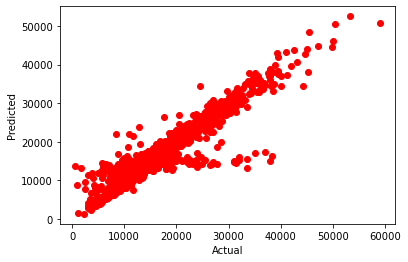

In [19]:
# insert code here
import matplotlib.pyplot as plt
plt.plot(y_test,selling_price_prediction , 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

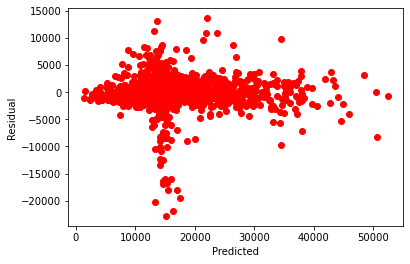

In [20]:
plt.plot(selling_price_prediction, selling_price_prediction - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

Insert description here.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [22]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing',preprocessor ), ('ridge', Ridge(alpha=100))])
modeling_pipeline_ridge.fit(X_training, y_training)
modeling_pipeline_ridge['ridge'].coef_
model_pipeline['lm'].coef_

array([  887.27571961,  -225.8804183 ,  6817.22030075, -2031.21316873,
       -2258.08088636, -2066.51680948, -1977.60509939, -1939.85932751,
       -2645.77654805, -2881.12980967, -2439.73347347, -1881.48899097,
        -550.68502334,   154.6562056 ,   720.37926956,  -110.31945307,
         -31.25653246,  -823.6350173 ,    83.03900137,  -804.38607966,
         -31.26323912,  -920.26223804,  -849.52476602,   109.44645156,
        -191.16092639,   441.92462668,   575.46182254,  -341.51282197,
         257.63435318,  -274.74445571,  -546.95092706,   301.03275319,
        -816.96419104,  -403.11076571,  -793.08276058,  -231.64918457,
       -1843.22786016,  -629.60192849,   347.37975236,    91.2398466 ,
        -454.03507043,  -295.42179913,  -100.24197336,   -27.36530842])

In [23]:
from collections import defaultdict
alphas = [0, 10, 20, 50, 100, 150]

ridge_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('data_processing',preprocessor ), ('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_training, y_training)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_training, y_training)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)

print('Done')

Done


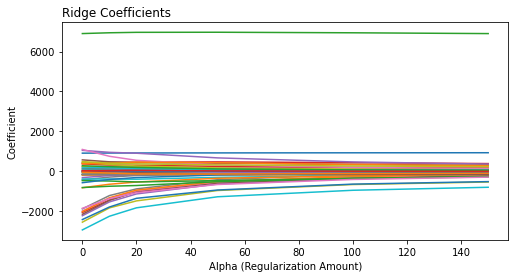

In [24]:
coefficients_ridge = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients_ridge = coefficients_ridge.reset_index()
coefficients_ridge = coefficients_ridge.rename(columns={'index':'coefficient_nbr'})
coefficients_ridge = coefficients_ridge.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients_ridge.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.show()

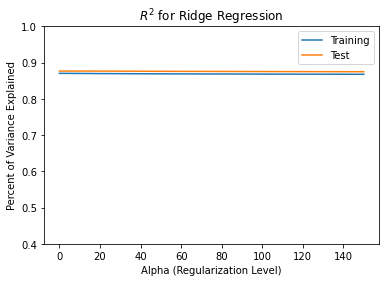

In [25]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()